# Contents
## 1 Import libraries
## 2 Import dataframe
## 3 Security implications
## 4 Create regional segmentation of the data
### Define different regions using lists
### Use the loc function to create new Region column
## 5 Create an exclusion flag for low-activity customers
## 6 Create a profiling varable
### Age profile
### Income profile
### Departments profile
### Family status profile
## 7 Descriptive statistics


# 1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/gil/Documents/06-2023 Instacart Basket Analysis New'

# 2 Import dataframe

In [3]:
df_all_data_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customers_ords_prods_merged.pkl'))


In [4]:
df_all_data_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,number_of_days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,Number of Dependents,Marital Status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# 3 Security implications

In [8]:
#Drop first and last name due to PII
df_all_data_merged = df_all_data_merged.drop(columns = ['First Name', 'Last Name'])

# 4 Create regional segmentation of the data

## Define different regions using lists

In [9]:
northeast = ["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]


In [10]:
midwest = ["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]


In [11]:
south = ["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]


In [12]:
west = ["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", "Hawaii"]

## Use the loc function to create new Region column

In [14]:
df_all_data_merged.loc[df_all_data_merged['STATE'].isin(northeast), 'region'] = 'Northeast'

In [16]:
df_all_data_merged.loc[df_all_data_merged['STATE'].isin(midwest), 'region'] = 'Midwest'

In [17]:
df_all_data_merged.loc[df_all_data_merged['STATE'].isin(south), 'region'] = 'South'

In [18]:
df_all_data_merged.loc[df_all_data_merged['STATE'].isin(west), 'region'] = 'West'

In [19]:
#Create a crosstab to check spending patternt across regions
crosstab = pd.crosstab(df_all_data_merged['region'], df_all_data_merged['spending_flag'], dropna = False)

In [20]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,7589534,7791
Northeast,5717129,5607
South,10781873,10012
West,8284433,8480


# 5 Create an exclusion flag for low-activity customers

In [23]:
#Check the columns names
df_all_data_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'number_of_days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_time_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'Gender', 'STATE', 'Age', 'date_joined',
       'Number of Dependents', 'Marital Status', 'income', '_merge', 'region'],
      dtype='object')

In [25]:
df_all_data_merged.loc[df_all_data_merged['max_order'] < 5,'customer_activity'] = 'Low-activity customer'


In [80]:
df_all_data_merged.loc[df_all_data_merged['max_order'] >= 5,'customer_activity'] = 'High-activity customer'


In [82]:
high_activity_cust = df_all_data_merged[df_all_data_merged['customer_activity']=='High-activity customer']

In [83]:
#Export the high-activity customers dataframe
high_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_cust.pkl'))

# 6 Create a profiling varable

## Age profile

In [90]:
#Create an age group column, with 3 different age categories
high_activity_cust.loc[high_activity_cust['Age'] >= 35 & (high_activity_cust['Age'] < 65), 'age_group'] = 'Middle-aged'
high_activity_cust.loc[high_activity_cust['Age']<35,'age_group']='Young adult'
high_activity_cust.loc[high_activity_cust['Age']>= 65,'age_group']='Senior'

/var/folders/4s/g64wcrgs6kjdk2rrxgv7bnsw0000gn/T/ipykernel_90473/1558708156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_cust.loc[high_activity_cust['Age'] >= 35 & (high_activity_cust['Age'] < 65), 'age_group'] = 'Middle-aged'


In [91]:
#Check the frequency of the values
high_activity_cust['age_group'].value_counts()

Middle-aged    14526725
Young adult     8242295
Senior          8195544
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Number of customers by age group')

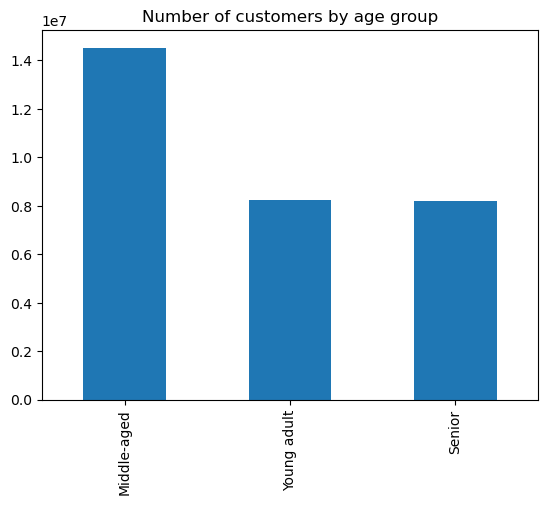

In [151]:
#Create a bar chart showing customers by age
bar_age = high_activity_cust['age_group'].value_counts().plot.bar()
plt.title('Number of customers by age group')


In [107]:
#Export the graph 
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age.png'))

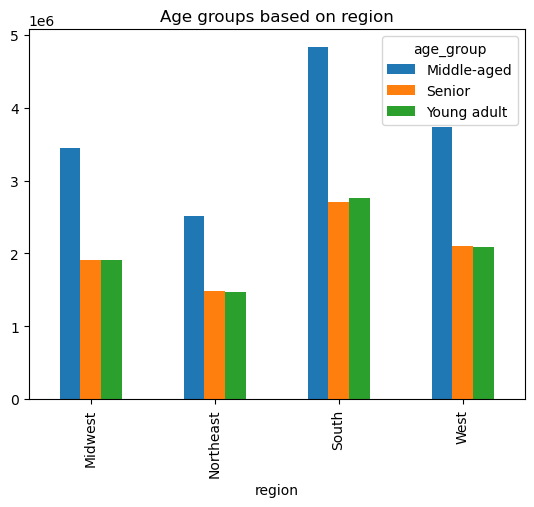

In [126]:
#create a bar chart between age and region
bar_age_region = crosstab2.plot.bar()
plt.title('Age groups based on region')
plt.show()

In [127]:
#Export the graph 
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [128]:
#create a crosstab to see customers based on age and region 
crosstab2 = pd.crosstab(high_activity_cust['region'],high_activity_cust['age_group'], dropna = False)

In [129]:
crosstab2

age_group,Middle-aged,Senior,Young adult
region,,,
Midwest,3445594,1904046,1911873
Northeast,2511803,1484807,1468075
South,4834220,2708461,2768458
West,3735108,2098230,2093889


In [130]:
#create a crosstab to see customers based on age and loyalty level
crosstab3 = pd.crosstab(high_activity_cust['loyalty_flag'],high_activity_cust['age_group'], dropna = False)

In [131]:
crosstab3

age_group,Middle-aged,Senior,Young adult
loyalty_flag,,,
Loyal customer,4844731,2723958,2715404
New customer,2245396,1276659,1281640
Regular customer,7436598,4194927,4245251


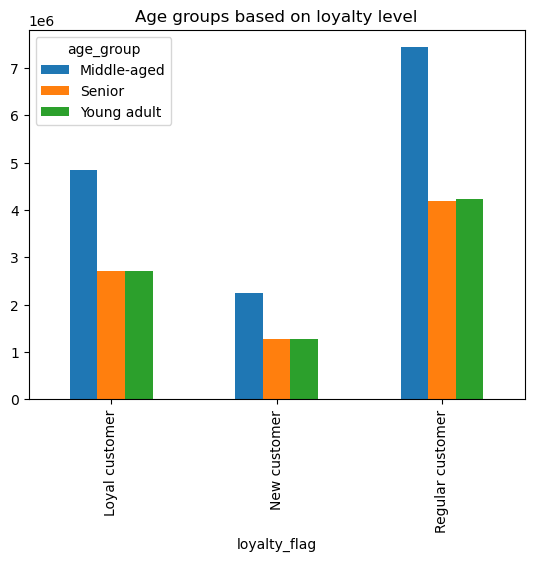

In [132]:
#create a bar chart between age and loyalty level
bar_age_loyalty = crosstab3.plot.bar()
plt.title('Age groups based on loyalty level')
plt.show()

In [133]:
#Export the graph 
bar_age_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_loyalty.png'))

Text(0.5, 1.0, 'Ordering frequency')

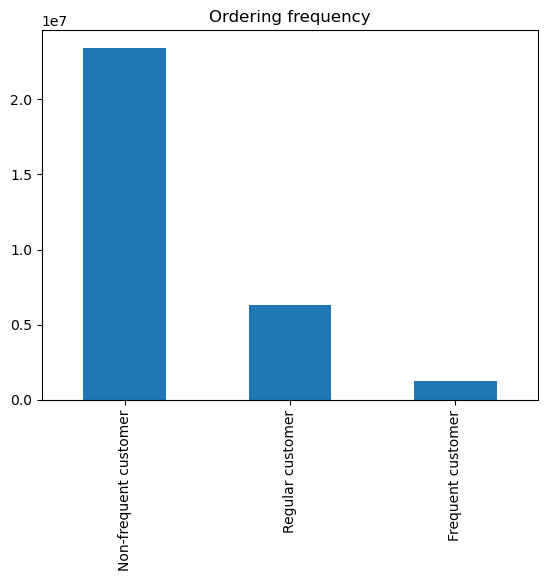

In [228]:
#Create a bar chart showing ordering frequency
bar_order_frequency = high_activity_cust['order_frequency_flag'].value_counts().plot.bar()
plt.title('Ordering frequency')


In [229]:
#Export the graph 
bar_order_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_frequency.png'))

In [136]:
#create a crosstab to see customers based on age and average price
crosstab4 = pd.crosstab(high_activity_cust['order_frequency_flag'],high_activity_cust['age_group'], dropna = False)

In [137]:
crosstab4

age_group,Middle-aged,Senior,Young adult
order_frequency_flag,,,
Frequent customer,590336,322732,325273
Non-frequent customer,10969953,6192967,6263937
Regular customer,2966436,1679845,1653085


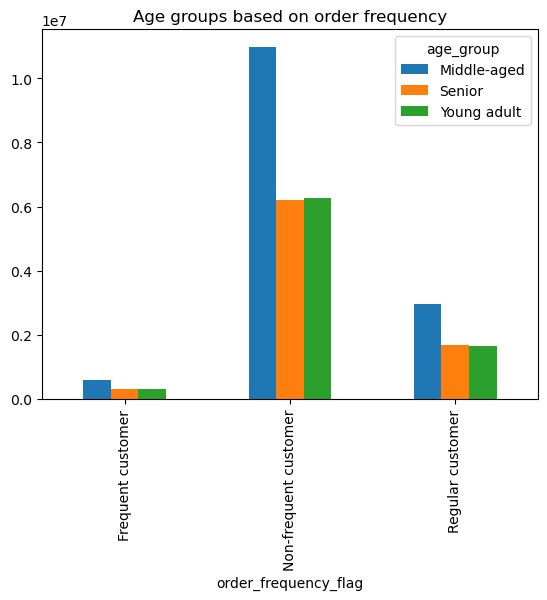

In [138]:
#create a bar chart between age and order frequency
bar_age_order_frequency = crosstab4.plot.bar()
plt.title('Age groups based on order frequency')
plt.show()

In [211]:
#Export the graph 
bar_age_order_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_order_frequency.png'))

## Income profile

In [111]:
#Create an income level column with 3 different income levels
high_activity_cust.loc[high_activity_cust['income'] >= 40000 & (high_activity_cust['income'] < 80000), 'income_level'] = 'Middle-income'
high_activity_cust.loc[high_activity_cust['income']<40000,'income_level']='Low-income'
high_activity_cust.loc[high_activity_cust['income']>= 80000,'income_level']='High-income'

/var/folders/4s/g64wcrgs6kjdk2rrxgv7bnsw0000gn/T/ipykernel_90473/2599687018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_cust.loc[high_activity_cust['income'] >= 40000 & (high_activity_cust['income'] < 80000), 'income_level'] = 'Middle-income'


In [112]:
#Check the frequency of the values
high_activity_cust['income_level'].value_counts()

High-income      19972916
Middle-income     9379623
Low-income        1612025
Name: income_level, dtype: int64

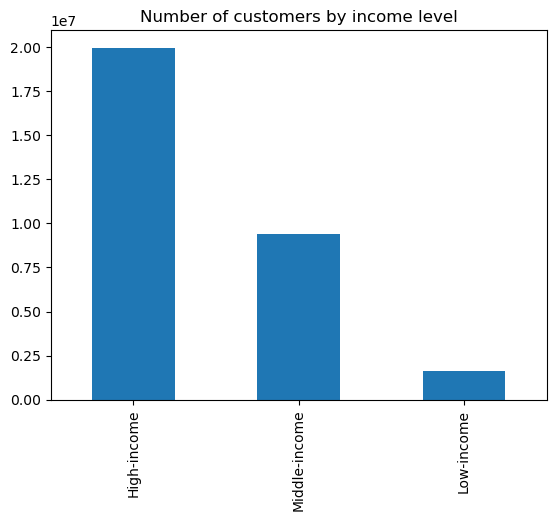

In [124]:
#Create a bar chart showing customers by income
bar_income = high_activity_cust['income_level'].value_counts().plot.bar()
plt.title('Number of customers by income level')


In [47]:
#Export the graph 
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

In [141]:
#create a crosstab to see customers based on income and the region
crosstab5 = pd.crosstab(high_activity_cust['income_level'],high_activity_cust['region'], dropna = False)

In [142]:
crosstab5

region,Midwest,Northeast,South,West
income_level,,,,
High-income,4716570,3557522,6609116,5089708
Low-income,373583,283124,552104,403214
Middle-income,2171360,1624039,3149919,2434305


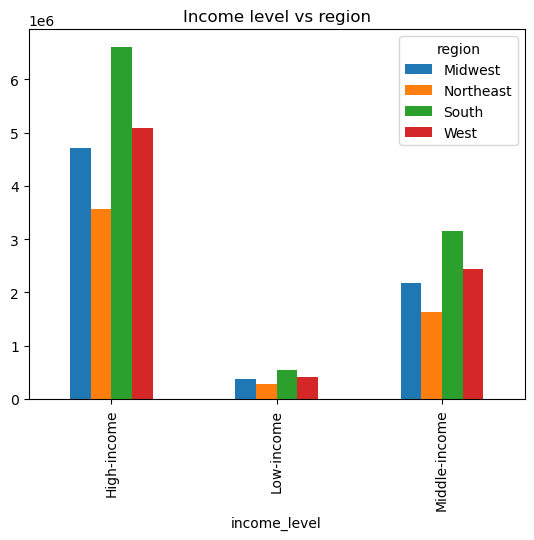

In [145]:
#create a bar chart between income level and region
bar_income_region = crosstab5.plot.bar()
plt.title('Income level vs region')
plt.show()

In [212]:
#Export the graph 
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))

In [153]:
#create a crosstab to see customers based on income and the region
crosstab6 = pd.crosstab(high_activity_cust['income_level'],high_activity_cust['Marital Status'], dropna = False)

In [154]:
crosstab6

Marital Status,divorced/widowed,living with parents and siblings,married,single
income_level,,,,
High-income,2206395,470664,14500805,2795052
Low-income,109005,99551,1105432,298037
Middle-income,329871,910957,6137474,2001321


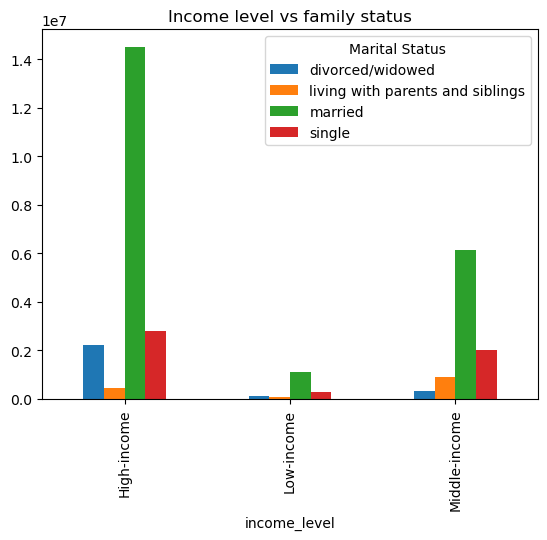

In [195]:
#create a bar chart between income level and family status
bar_income_family_status = crosstab6.plot.bar()
plt.title('Income level vs family status')
plt.show()

In [213]:
#Export the graph 
bar_income_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_family_status.png'))

In [230]:
#create a crosstab to see customers loyalty vs ordering frequency
crosstab12 = pd.crosstab(high_activity_cust['loyalty_flag'],high_activity_cust['order_frequency_flag'], dropna = False)

In [231]:
crosstab12

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,699012,5331038,4254043
New customer,205319,4035241,563135
Regular customer,334010,14060578,1482188


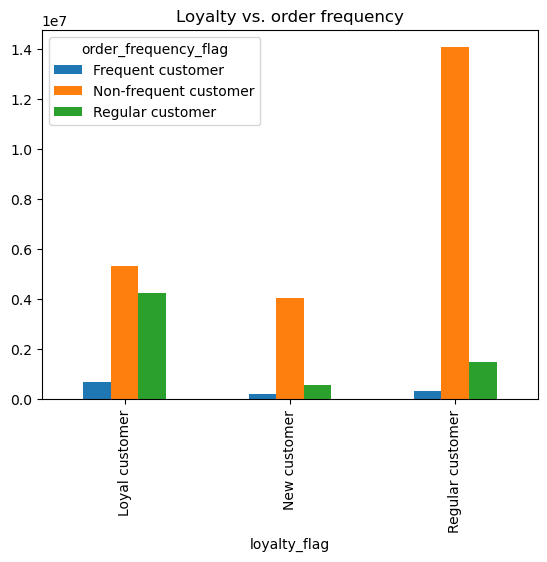

In [232]:
#create a bar chart between loyalty level and order frequency
bar_loyalty_order_frequency = crosstab12.plot.bar()
plt.title('Loyalty vs. order frequency')
plt.show()

In [233]:
#Export the graph 
bar_loyalty_order_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_order_frequency.png'))

In [234]:
#create a crosstab to see customers' region vs. ordering frequency
crosstab13 = pd.crosstab(high_activity_cust['region'],high_activity_cust['order_frequency_flag'], dropna = False)

In [235]:
crosstab13

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,286895,5529578,1445040
Northeast,230255,4114344,1120086
South,413504,7821852,2075783
West,307687,5961083,1658457


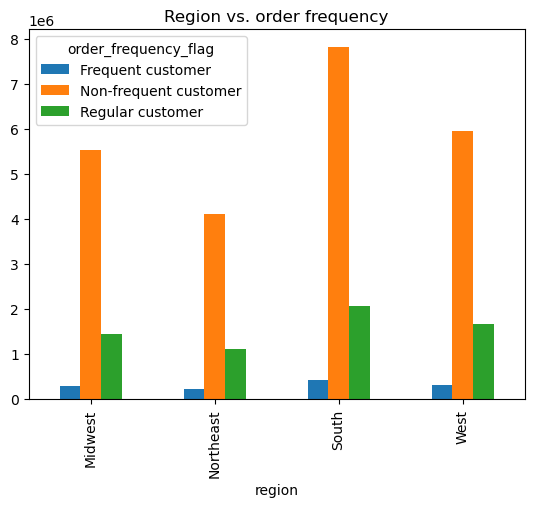

In [237]:
#create a bar chart between region and order frequency
bar_region_order_frequency = crosstab13.plot.bar()
plt.title('Region vs. order frequency')
plt.show()

In [238]:
#Export the graph 
bar_region_order_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_order_frequency.png'))

## Departments profile

In [115]:
#import departments
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [116]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [117]:
#rename Unnamed to department_id
departments.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [118]:
#Merge department with high_activity_cust
high_activity_cust = high_activity_cust.merge(departments,on = 'department_id')

Text(0.5, 1.0, 'Most profitable departments')

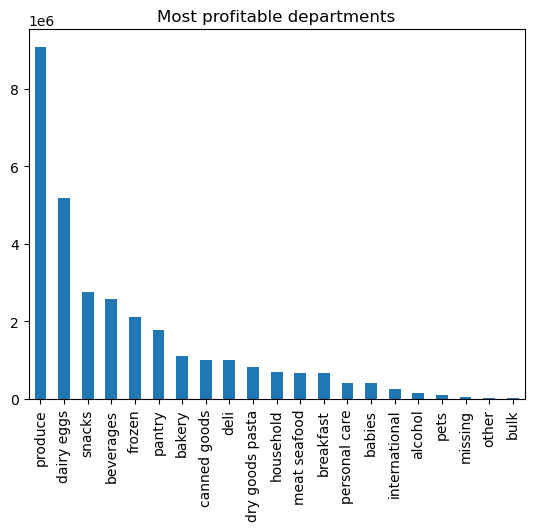

In [119]:
#Create a bar chart showing most profitable departments
bar_department = high_activity_cust['department'].value_counts().plot.bar()
plt.title('Most profitable departments')


In [214]:
#Export the graph 
bar_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department.png'))

In [156]:
#create a crosstab to see customers based on income and the region
crosstab7 = pd.crosstab(high_activity_cust['department'],high_activity_cust['income_level'], dropna = False)

In [157]:
crosstab7

income_level,High-income,Low-income,Middle-income
department,,,
alcohol,94519,8718,41390
babies,279194,12547,118651
bakery,739491,49409,331928
beverages,1576609,191662,803630
breakfast,415644,46066,209140
bulk,20332,2247,10872
canned goods,680557,34946,296571
dairy eggs,3393109,235552,1548521
deli,649596,51355,302883


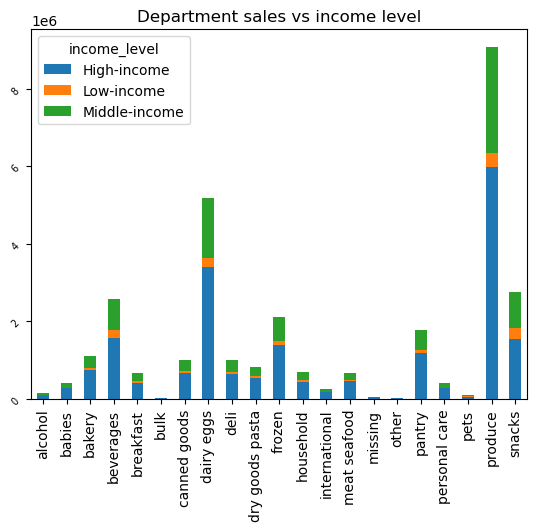

In [196]:
#create a bar chart between income level and family status
bar_dept_sales_income = crosstab7.plot.bar(stacked=True)
plt.title('Department sales vs income level')
plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation = 45, fontsize=7)
plt.show()


In [215]:
#Export the graph 
bar_dept_sales_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_sales_income.png'))

## Family status profile

In [120]:
#Create marital status column  
high_activity_cust.loc[(high_activity_cust['Marital Status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (high_activity_cust['Number of Dependents']==0), 'family_flag'] = 'single no dependents'
high_activity_cust.loc[(high_activity_cust['Marital Status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (high_activity_cust['Number of Dependents'] >=1), 'family_flag'] = 'single with dependents'
high_activity_cust.loc[(high_activity_cust['Marital Status'] == 'married') & (high_activity_cust['Number of Dependents'] == 1), 'family_flag'] = 'married no dependents'
high_activity_cust.loc[(high_activity_cust['Marital Status'] == 'married') & (high_activity_cust['Number of Dependents'] > 1), 'family_flag'] = 'married with dependents'

In [121]:
#Check the frequencies
high_activity_cust['family_flag'].value_counts()

married with dependents    14532650
single no dependents        7739681
married no dependents       7211061
single with dependents      1481172
Name: family_flag, dtype: int64

In [239]:
#create a crosstab to see customers based on age group and marital status
crosstab14 = pd.crosstab(high_activity_cust['age_group'],high_activity_cust['Marital Status'], dropna = False)

In [240]:
crosstab14

Marital Status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle-aged,623313,0,10872560,3030852
Senior,2021958,0,6173586,0
Young adult,0,1481172,4697565,2063558


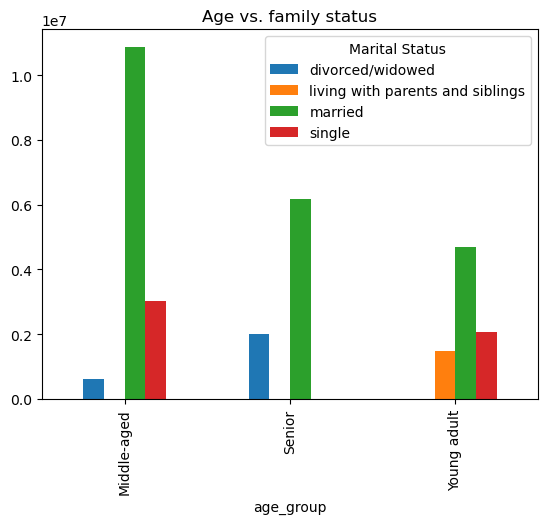

In [241]:
#create a bar chart between age and marital status
bar_age_marital_status = crosstab14.plot.bar()
plt.title('Age vs. family status')
plt.show()

In [242]:
#Export the graph 
bar_age_marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_marital_status.png'))

Text(0.5, 1.0, 'Number of customers by family status')

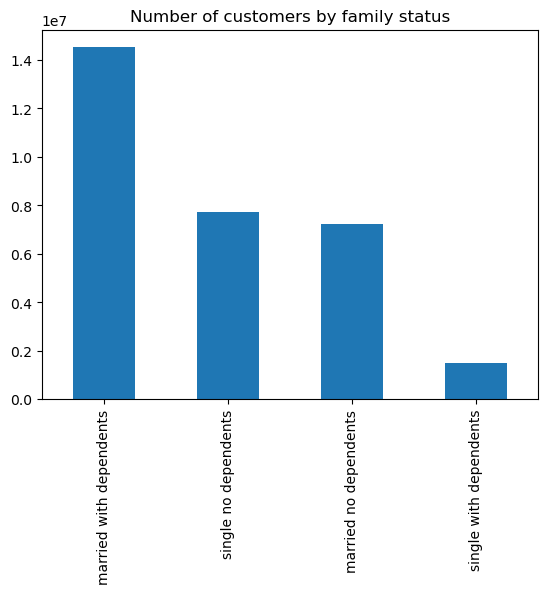

In [122]:
#Create a bar chart showing customers by family status
bar_marital_status = high_activity_cust['family_flag'].value_counts().plot.bar()
plt.title('Number of customers by family status')


In [216]:
#Export the graph 
bar_marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_status.png'))

In [167]:
#Create family_status profile
high_activity_cust.loc[(high_activity_cust['Number of Dependents'] == 0), 'dependents'] = 'No dependants'
high_activity_cust.loc[(high_activity_cust['Number of Dependents'] >= 1), 'dependents'] = 'Has dependants'

In [168]:
high_activity_cust['dependents'].value_counts(dropna = False)

Has dependants    23224883
No dependants      7739681
Name: dependents, dtype: int64

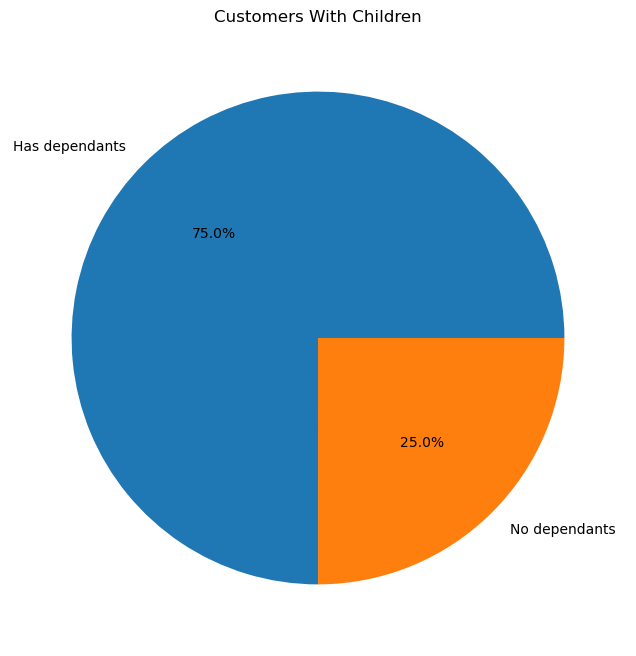

In [172]:
#create a pie chart showing the number of dependents
pie_kids = high_activity_cust['dependents'].value_counts().plot.pie(figsize = (8,8), 
autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Customers With Children')
plt.show()

In [217]:
#Export the graph 
pie_kids.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_kids.png'))

In [174]:
#create a crosstab to see customers based on income and the region
crosstab8 = pd.crosstab(high_activity_cust['price_range_loc'],high_activity_cust['Marital Status'], dropna = False)

In [175]:
crosstab8

Marital Status,divorced/widowed,living with parents and siblings,married,single
price_range_loc,,,,
High-range product,34134,18997,281501,63321
Low-range product,826382,461807,6793795,1592856
Mid-range product,1784755,1000368,14668415,3438233


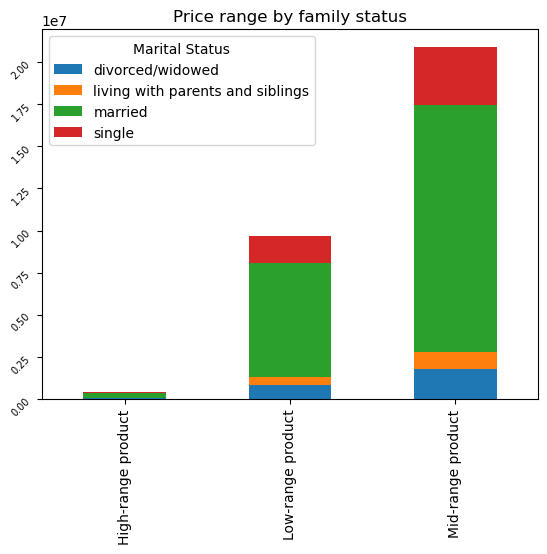

In [197]:
#create a bar chart between price range family status
bar_price_family_status = crosstab8.plot.bar(stacked=True)
plt.title('Price range by family status')
plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation = 45, fontsize=7)
plt.show()


In [218]:
#Export the graph 
bar_price_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_family_status.png'))

In [179]:
#create a crosstab between order frequency and family status
crosstab9 = pd.crosstab(high_activity_cust['order_frequency_flag'],high_activity_cust['Marital Status'], dropna = False)

In [180]:
crosstab9

Marital Status,divorced/widowed,living with parents and siblings,married,single
order_frequency_flag,,,,
Frequent customer,106160,60753,849158,222270
Non-frequent customer,2003402,1132628,16449793,3841034
Regular customer,535709,287791,4444760,1031106


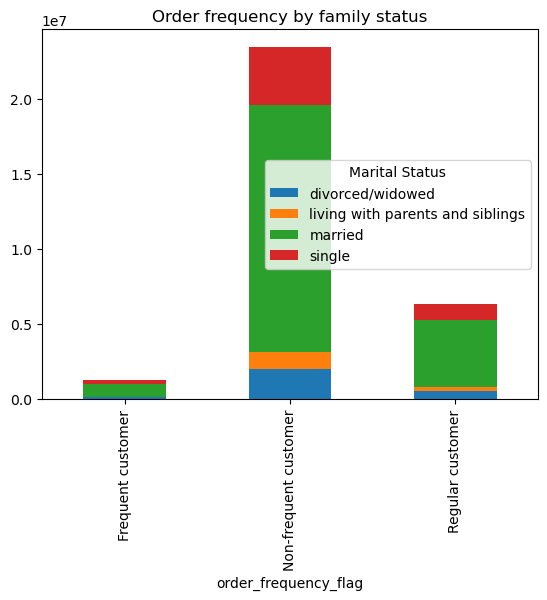

In [198]:
#create a bar chart between order frequency and family status
bar_order_frequency_family_status = crosstab9.plot.bar(stacked=True)
plt.title('Order frequency by family status')
plt.show()

In [219]:
#Export the graph 
bar_order_frequency_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_frequency_family_status.png'))

In [187]:
#create a crosstab between order frequency and family status
crosstab10 = pd.crosstab(high_activity_cust['department'],high_activity_cust['Marital Status'], dropna = False)

In [188]:
crosstab10

Marital Status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11859,8379,99421,24968
babies,34351,19381,287683,68977
bakery,95735,53684,785749,185660
beverages,220879,119107,1807453,424462
breakfast,56590,33198,471220,109842
bulk,2676,1633,23818,5324
canned goods,84268,48477,712577,166752
dairy eggs,442602,250207,3632599,851774
deli,86749,48119,702333,166633


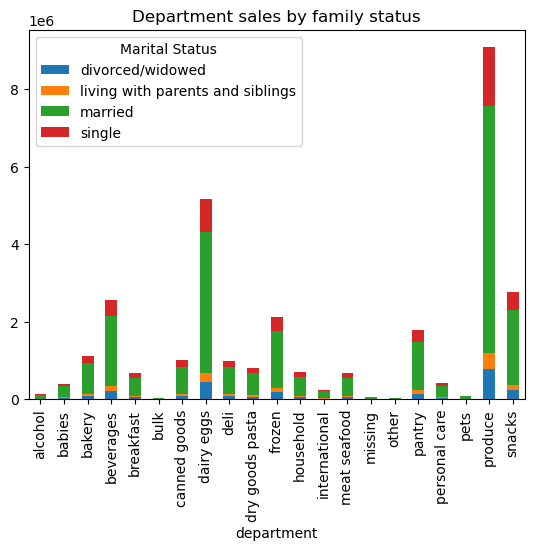

In [199]:
#create a bar chart between department sales and family status
bar_department_family_satus = crosstab10.plot.bar(stacked=True)
plt.title('Department sales by family status')
plt.show()

In [220]:
#Export the graph 
bar_department_family_satus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_family_satus.png'))

In [191]:
#create a crosstab between spending and family status
crosstab11 = pd.crosstab(high_activity_cust['spending_flag'],high_activity_cust['Marital Status'], dropna = False)

In [192]:
crosstab11

Marital Status,divorced/widowed,living with parents and siblings,married,single
spending_flag,,,,
High spender,2643169,1480503,21728474,5090579
Low spender,2102,669,15237,3831


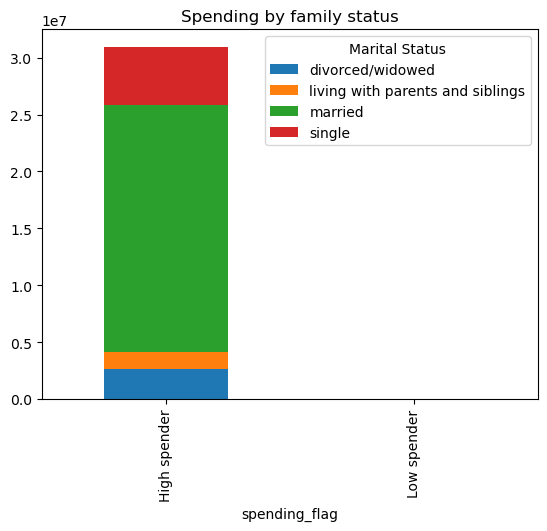

In [221]:
#create a bar chart between spending and family status
bar_spending_family_status = crosstab11.plot.bar(stacked=True)
plt.title('Spending by family status')
plt.show()

In [222]:
#Export the graph 
bar_spending_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_family_status.png'))

# 7 Descriptive statistics 

In [210]:
high_activity_cust.describe()

,order_id,order_number,orders_day_of_week,order_hour_of_day,number_of_days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price,median_prior_orders,Age,Number of Dependents,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,1.193352e+01,3.442569e+01,4.224762e+02,2.521818e+01,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.913444e+02,2.489504e+01,4.666853e+03,6.760479e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,1.490000e+01,2.100000e+01,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,2.070000e+01,3.000000e+01,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,2.360000e+01,3.000000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,9.999900e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05
